In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Краткое руководство по триангуляции Делоне в scipy

Сгенеририуем триангуляцию по заданным точкам и рассмотрим, как можно с ней работать и что извлекать:

In [2]:
points = np.array([[0, 0], [5, 0], [10, 3], [0, 5], [5, 5], [5, 10], [3, 6], [1, -1], [7, -2], [2, 5]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

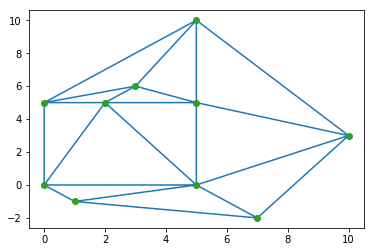

In [3]:
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:, 1], 'o')
plt.show()

In [4]:
#Все узлы, которые есть в триангуляции
tri.points 

array([[  0.,   0.],
       [  5.,   0.],
       [ 10.,   3.],
       [  0.,   5.],
       [  5.,   5.],
       [  5.,  10.],
       [  3.,   6.],
       [  1.,  -1.],
       [  7.,  -2.],
       [  2.,   5.]])

In [5]:
#Id узлов, относительно tri.points, для каждого треугольника (узлы идут против часовой стрелке)
tri.simplices  

array([[5, 4, 2],
       [1, 8, 2],
       [4, 1, 2],
       [1, 7, 8],
       [7, 1, 0],
       [6, 4, 5],
       [3, 6, 5],
       [9, 1, 4],
       [9, 3, 0],
       [1, 9, 0],
       [6, 9, 4],
       [9, 6, 3]], dtype=int32)

In [6]:
#Узлы, для конкретного треугольника
points[tri.simplices[1]] 

array([[ 5,  0],
       [ 7, -2],
       [10,  3]])

In [7]:
#Id треугольников, который являются соседями для заданного треугольника
#i - номер вершины у переданного треугольника, а i элемент - id треугольника напротив этой вершины (иначе -1)
tri.neighbors[0]

array([ 2, -1,  5], dtype=int32)

In [8]:
#Id треугольников, в которых попадают переданные точки (либо -1, если точка не в триангуляции)
tri.find_simplex([(0.1, 0.2), (1.5, 0.5)])

array([9, 9], dtype=int32)

In [9]:
#Индексы соседних вершин для вершины k - это indptr[indices[k]:indices[k+1]] относительно tri.points
tri.vertex_neighbor_vertices

(array([ 0,  4, 10, 14, 18, 23, 27, 31, 34, 37, 42], dtype=int32),
 array([7, 1, 9, 3, 8, 2, 4, 7, 0, 9, 5, 4, 1, 8, 6, 5, 9, 0, 5, 2, 1, 6, 9,
        4, 2, 6, 3, 4, 5, 3, 9, 1, 8, 0, 1, 2, 7, 1, 4, 3, 0, 6], dtype=int32))

In [10]:
#Например, получим индексы соседних вершин для вершины 1
b = tri.vertex_neighbor_vertices[0][0]
e = tri.vertex_neighbor_vertices[0][0+1]
tri.vertex_neighbor_vertices[1][b : e]

array([7, 1, 9, 3], dtype=int32)

In [11]:
#Каждой вершине (по индексу) сопоставим один из инцидентных треугольников
tri.vertex_to_simplex

array([4, 1, 0, 6, 0, 0, 5, 3, 1, 7], dtype=int32)